#### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset

In [2]:
stock_data = pd.read_csv("data/MTNOY.csv")
stock_data = stock_data[['Date','Close']]

#### Inspect first 5 rows and data types of the dataset

In [3]:
stock_data.head()

Date  Close
0  2010-02-01  14.70
1  2010-02-02  14.79
2  2010-02-03  14.60
3  2010-02-04  14.10
4  2010-02-05  14.28

In [4]:
stock_data.shape

(1490, 2)

In [5]:
stock_data.dtypes

Date      object
Close    float64
dtype: object

#### Transform date int to date

In [6]:
stock_data['Date']= pd.to_datetime(stock_data['Date'], format = "%Y-%m-%d")

In [7]:
stock_data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

#### Set date as index

In [8]:
stock_data.set_index('Date',inplace = True)
stock_data.shape

(1490, 1)

#### Plot the stock data on a line plot

Text(0.5, 1.0, 'Time series analysis of MTN Group Limited Stocks')

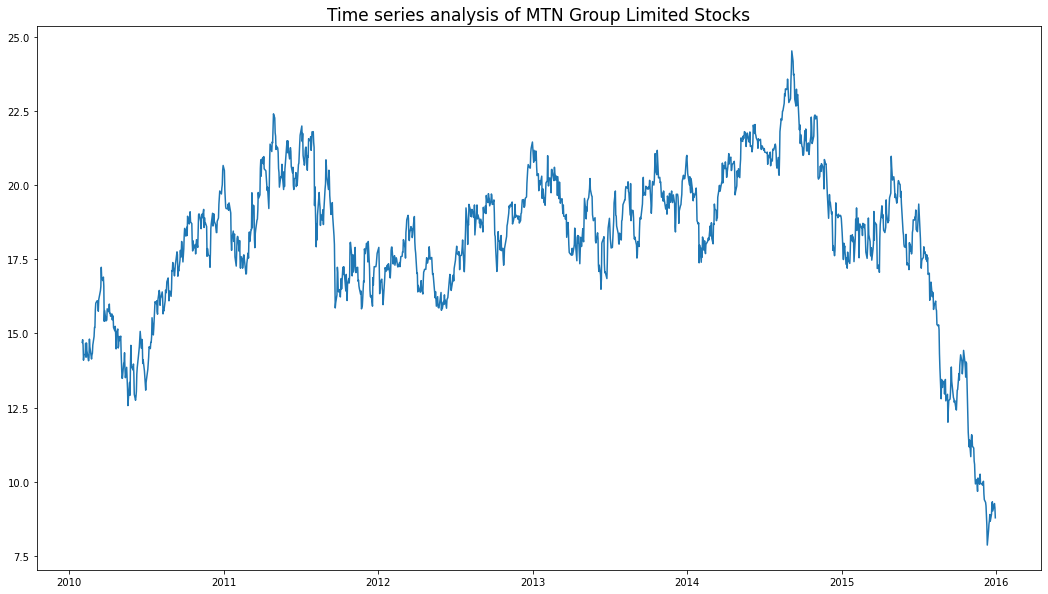

In [9]:
plt.figure(figsize= (18,10))

plt.plot(stock_data.index, stock_data['Close'],color='tab:blue')
plt.title("Time series analysis of MTN Group Limited Stocks",fontsize = 17)

#### Perform Moving Average Smoothing

In [10]:
moving_data = stock_data.rolling(window=4)
moving_average_data = moving_data.mean()
moving_average_data.head()

Close
Date               
2010-02-01      NaN
2010-02-02      NaN
2010-02-03      NaN
2010-02-04  14.5475
2010-02-05  14.4425

In [11]:
moving_average_data.head()

Close
Date               
2010-02-01      NaN
2010-02-02      NaN
2010-02-03      NaN
2010-02-04  14.5475
2010-02-05  14.4425

#### Plot moving average against original time series using line plot

Text(0.5, 1.0, 'Time series analysis of MTN Group Limited Stocks VS Moving Average')

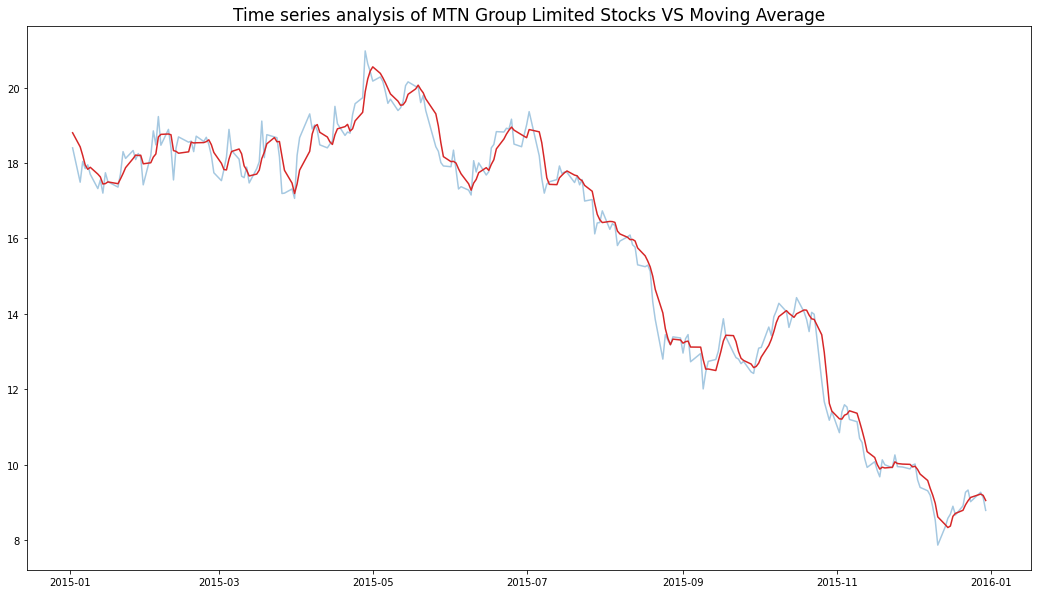

In [12]:
plt.figure(figsize= (18,10))

stock_data_subset = stock_data[stock_data.index>= '2015-01-01']
moving_average_data_subset = moving_average_data[moving_average_data.index>= '2015-01-01']


plt.plot(stock_data_subset.index, stock_data_subset['Close'],color='tab:blue',alpha = 0.4)
plt.plot(moving_average_data_subset.index,moving_average_data_subset['Close'],color='tab:red')
plt.title("Time series analysis of MTN Group Limited Stocks VS Moving Average",fontsize = 17)


#### Plot the residuals

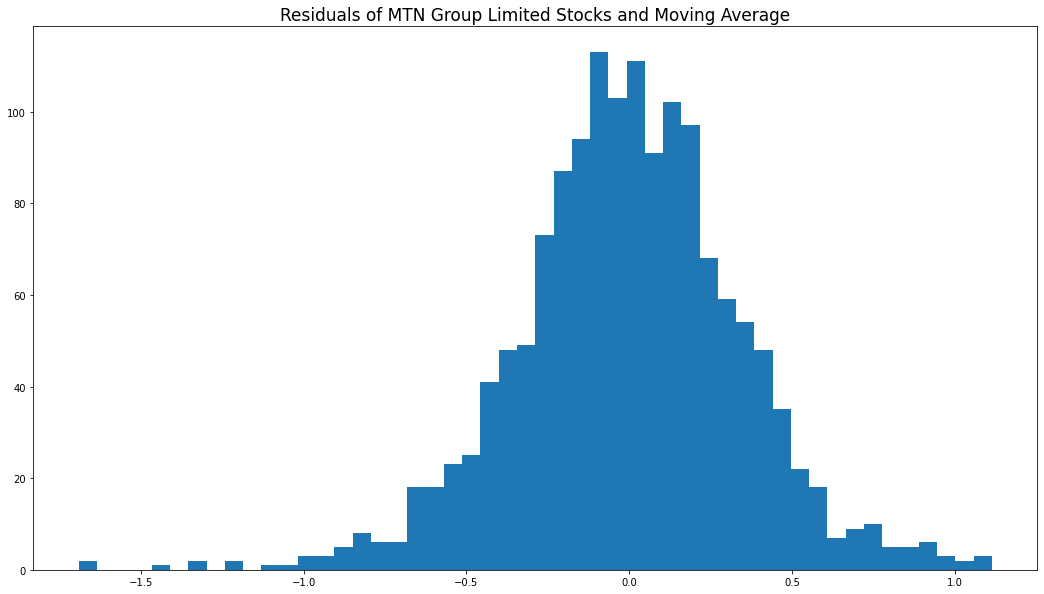

In [13]:
plt.figure(figsize= (18,10))

residuals = stock_data - moving_average_data
plt.hist(residuals, bins=50)
plt.title("Residuals of MTN Group Limited Stocks and Moving Average",fontsize = 17)
plt.show()

#### Identify residuals greater than 90th percentile and review

In [14]:
 percentile_90 = np.nanpercentile(abs(residuals['Close']),90)

In [15]:
residuals[abs(residuals['Close']) >= percentile_90]

Close
Date              
2010-03-18  0.5750
2010-03-25 -1.0125
2010-05-05 -0.5700
2010-05-06 -0.6625
2010-05-20 -0.6975
...            ...
2015-09-17  0.5875
2015-10-26 -1.2250
2015-10-27 -1.3100
2015-10-28 -0.8975
2015-12-11 -0.7475

[149 rows x 1 columns]